# Non-Crossing Configurations
Converting Example VII.16 from Analytic Combinatorics by Flajolet and Sedgewick to rational bivariate generating functions.

In [1]:
R = PolynomialRing(QQ, 'y, z')
y, z = R.gens()

In [2]:
# finite height function implemented exactly as is on page 85
def finite_height(H, r=1, s=1):
    P = H.newton_polytope()
    vertices = P.vertices()
    vertices = list(map(vector, vertices))
    for j, vj in enumerate(vertices):
        on_line = negative = positive = False
        for k, vk in enumerate(vertices):
            if j == k: continue
            position = (vj - vk).dot_product(vector([-s, r]))
            if position == 0: on_line = True
            if position < 0: negative = True
            if position > 0: positive = True
        # there is a vk such that the line vj -> vk has slope -s/r and
        # the remainder of the polygon is on one side of the line
        if on_line and not (negative and positive):
            return True
    return False

## non-crossing trees

In [3]:
P = y^3 - z*y + z^2 
show(P.discriminant(y))
show(P.derivative(y))

-27*z^4 + 4*z^3

3*y^2 - z

In [4]:
# the GF starts: z + z^2 + 3z^2 + ...
Q = simplify(P.subs(y = z + z^2 + 3*z^3 + z^3*y) / z^4)
show(Q)
show(Q.derivative(y))

y^3*z^5 + 9*y^2*z^5 + 3*y^2*z^4 + 27*y*z^5 + 3*y^2*z^3 + 18*y*z^4 + 27*z^5 + 21*y*z^3 + 27*z^4 + 6*y*z^2 + 36*z^3 + 3*y*z + 19*z^2 - y + 12*z

3*y^2*z^5 + 18*y*z^5 + 6*y*z^4 + 27*z^5 + 6*y*z^3 + 18*z^4 + 21*z^3 + 6*z^2 + 3*z - 1

In [5]:
F = y^2 * Q.derivative(y).subs(z = y*z) / Q.subs(z = y*z)
print(F)
show(F)

(3*y^8*z^5 + 18*y^7*z^5 + 27*y^6*z^5 + 6*y^6*z^4 + 18*y^5*z^4 + 6*y^5*z^3 + 21*y^4*z^3 + 6*y^3*z^2 + 3*y^2*z - y)/(y^7*z^5 + 9*y^6*z^5 + 27*y^5*z^5 + 3*y^5*z^4 + 27*y^4*z^5 + 18*y^4*z^4 + 3*y^4*z^3 + 27*y^3*z^4 + 21*y^3*z^3 + 36*y^2*z^3 + 6*y^2*z^2 + 19*y*z^2 + 3*y*z + 12*z - 1)


(3*y^8*z^5 + 18*y^7*z^5 + 27*y^6*z^5 + 6*y^6*z^4 + 18*y^5*z^4 + 6*y^5*z^3 + 21*y^4*z^3 + 6*y^3*z^2 + 3*y^2*z - y)/(y^7*z^5 + 9*y^6*z^5 + 27*y^5*z^5 + 3*y^5*z^4 + 27*y^4*z^5 + 18*y^4*z^4 + 3*y^4*z^3 + 27*y^3*z^4 + 21*y^3*z^3 + 36*y^2*z^3 + 6*y^2*z^2 + 19*y*z^2 + 3*y*z + 12*z - 1)

True
1
True


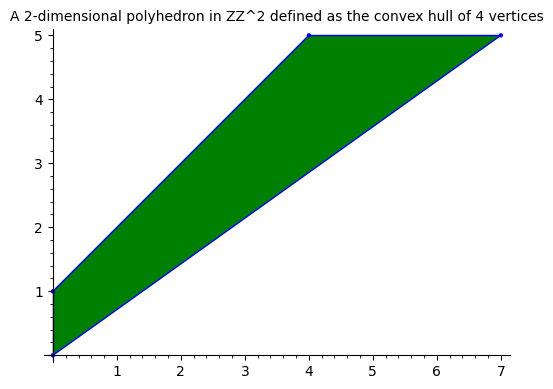

In [6]:
print(F.denominator().is_squarefree())
print(gcd(F.denominator(), F.numerator()))
print(finite_height(F.denominator()))
F.denominator().newton_polytope()

## non-crossing forests

In [7]:
P = y^3 + (z^2-z-3)*y^2 + (z+3)*y - 1
show(P.discriminant(y))
show(P.derivative(y))

5*z^6 - 8*z^5 - 32*z^4 + 4*z^3

2*y*z^2 + 3*y^2 - 2*y*z - 6*y + z + 3

In [8]:
# the GF starts: 1 + z + 2z^2 + 7z^3 + ...
Q = simplify(P.subs(y = 1 + z + 2*z^2 + 7*z^3 + z^3*y) / z^4)
show(Q)
show(Q.derivative(y))

y^3*z^5 + 21*y^2*z^5 + 7*y^2*z^4 + 147*y*z^5 + 2*y^2*z^3 + 98*y*z^4 + 343*z^5 + 44*y*z^3 + 343*z^4 + 10*y*z^2 + 210*z^3 + 3*y*z + 82*z^2 - y + 33*z

3*y^2*z^5 + 42*y*z^5 + 14*y*z^4 + 147*z^5 + 4*y*z^3 + 98*z^4 + 44*z^3 + 10*z^2 + 3*z - 1

In [9]:
F = y^2 * Q.derivative(y).subs(z = y*z) / Q.subs(z = y*z)
print(F)
show(F)

(3*y^8*z^5 + 42*y^7*z^5 + 147*y^6*z^5 + 14*y^6*z^4 + 98*y^5*z^4 + 4*y^5*z^3 + 44*y^4*z^3 + 10*y^3*z^2 + 3*y^2*z - y)/(y^7*z^5 + 21*y^6*z^5 + 147*y^5*z^5 + 7*y^5*z^4 + 343*y^4*z^5 + 98*y^4*z^4 + 2*y^4*z^3 + 343*y^3*z^4 + 44*y^3*z^3 + 210*y^2*z^3 + 10*y^2*z^2 + 82*y*z^2 + 3*y*z + 33*z - 1)


(3*y^8*z^5 + 42*y^7*z^5 + 147*y^6*z^5 + 14*y^6*z^4 + 98*y^5*z^4 + 4*y^5*z^3 + 44*y^4*z^3 + 10*y^3*z^2 + 3*y^2*z - y)/(y^7*z^5 + 21*y^6*z^5 + 147*y^5*z^5 + 7*y^5*z^4 + 343*y^4*z^5 + 98*y^4*z^4 + 2*y^4*z^3 + 343*y^3*z^4 + 44*y^3*z^3 + 210*y^2*z^3 + 10*y^2*z^2 + 82*y*z^2 + 3*y*z + 33*z - 1)

True
1
True


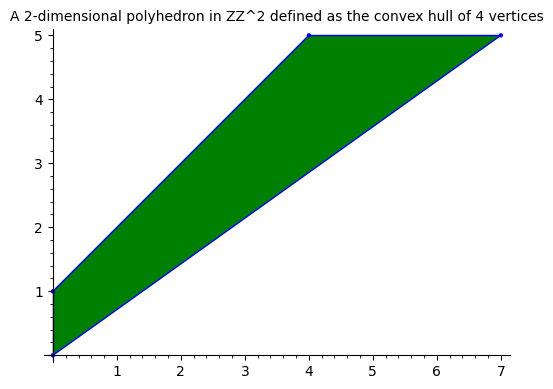

In [10]:
print(F.denominator().is_squarefree())
print(gcd(F.denominator(), F.numerator()))
print(finite_height(F.denominator()))
F.denominator().newton_polytope()

## non-crossing connected graphs

In [11]:
P = y^3 + y^2 - 3*z*y + 2*z^2
show(P.discriminant(y))
show(P.derivative(y))

-108*z^4 + z^2

3*y^2 + 2*y - 3*z

In [12]:
# the GF starts: z + z^2 + 4z^3 + ...
Q = simplify(P.subs(y = z + z^2 + z^2*y) / z^3)
show(Q)
show(Q.derivative(y))

y^3*z^3 + 3*y^2*z^3 + 3*y^2*z^2 + 3*y*z^3 + y^2*z + 6*y*z^2 + z^3 + 5*y*z + 3*z^2 - y + 4*z

3*y^2*z^3 + 6*y*z^3 + 6*y*z^2 + 3*z^3 + 2*y*z + 6*z^2 + 5*z - 1

In [13]:
F = y^2 * Q.derivative(y).subs(z = y*z) / Q.subs(z = y*z)
print(F)
show(F)

(3*y^6*z^3 + 6*y^5*z^3 + 3*y^4*z^3 + 6*y^4*z^2 + 6*y^3*z^2 + 2*y^3*z + 5*y^2*z - y)/(y^5*z^3 + 3*y^4*z^3 + 3*y^3*z^3 + 3*y^3*z^2 + y^2*z^3 + 6*y^2*z^2 + y^2*z + 3*y*z^2 + 5*y*z + 4*z - 1)


(3*y^6*z^3 + 6*y^5*z^3 + 3*y^4*z^3 + 6*y^4*z^2 + 6*y^3*z^2 + 2*y^3*z + 5*y^2*z - y)/(y^5*z^3 + 3*y^4*z^3 + 3*y^3*z^3 + 3*y^3*z^2 + y^2*z^3 + 6*y^2*z^2 + y^2*z + 3*y*z^2 + 5*y*z + 4*z - 1)

True
1
True


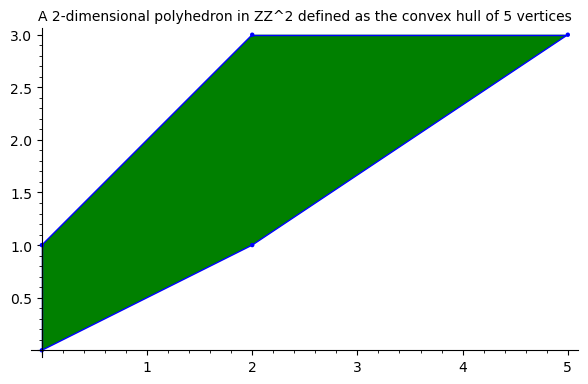

In [14]:
print(F.denominator().is_squarefree())
print(gcd(F.denominator(), F.numerator()))
print(finite_height(F.denominator()))
F.denominator().newton_polytope()

## non-crossing graphs

In [15]:
P = y^2 + (2*z^2 - 3*z - 2)*y + 3*z + 1
show(P.discriminant(y))
show(P.derivative(y))

4*z^4 - 12*z^3 + z^2

2*z^2 + 2*y - 3*z - 2

In [16]:
# the GF starts: 1 + z + 2z^2 + 8z^3 + ...
Q = simplify(P.subs(y = 1 + z + 2*z^2 + z^2*y) / z^3)
show(Q)
show(Q.derivative(y))

y^2*z + 6*y*z - y + 8*z

2*y*z + 6*z - 1

In [17]:
F = y^2 * Q.derivative(y).subs(z = y*z) / Q.subs(z = y*z)
print(F)
show(F)

(2*y^3*z + 6*y^2*z - y)/(y^2*z + 6*y*z + 8*z - 1)


(2*y^3*z + 6*y^2*z - y)/(y^2*z + 6*y*z + 8*z - 1)

True
1
False


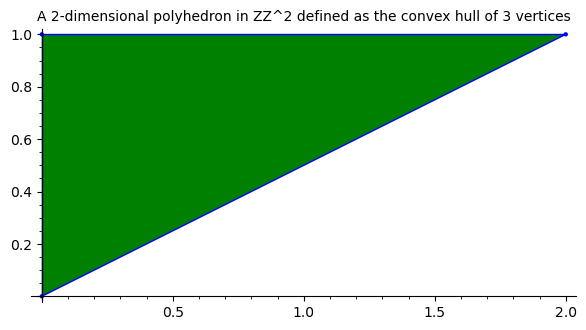

In [18]:
print(F.denominator().is_squarefree())
print(gcd(F.denominator(), F.numerator()))
print(finite_height(F.denominator()))
F.denominator().newton_polytope()

# Power Series Expansions

In [19]:
R = PowerSeriesRing(QQ, 'y, z')
y, z = R.gens()

In [20]:
T = (3*y^8*z^5 + 18*y^7*z^5 + 27*y^6*z^5 + 6*y^6*z^4 + 18*y^5*z^4 + 6*y^5*z^3 + 21*y^4*z^3 + 6*y^3*z^2 + 3*y^2*z - y)/(y^7*z^5 + 9*y^6*z^5 + 27*y^5*z^5 + 3*y^5*z^4 + 27*y^4*z^5 + 18*y^4*z^4 + 3*y^4*z^3 + 27*y^3*z^4 + 21*y^3*z^3 + 36*y^2*z^3 + 6*y^2*z^2 + 19*y*z^2 + 3*y*z + 12*z - 1)
show(T)

y + 12*y*z + 144*y*z^2 + 55*y^2*z^2 + 1728*y*z^3 + 1320*y^2*z^3 + 20736*y*z^4 + 273*y^3*z^3 + 23760*y^2*z^4 + 248832*y*z^5 + 9577*y^3*z^4 + 380160*y^2*z^5 + 2985984*y*z^6 - 3*y^5*z^3 + 1428*y^4*z^4 + 226836*y^3*z^5 + 5702400*y^2*z^6 + 35831808*y*z^7 + 64302*y^4*z^5 + 4500576*y^3*z^6 + 82114560*y^2*z^7 + 429981696*y*z^8 - 12*y^6*z^4 + 7752*y^5*z^5 + 1864351*y^4*z^6 + 80576640*y^3*z^7 + 1149603840*y^2*z^8 + 5159780352*y*z^9 + 417657*y^5*z^6 + 43802256*y^4*z^7 + 1348482816*y^3*z^8 + 15765995520*y^2*z^9 + 61917364224*y*z^10 - 63*y^7*z^5 + 43263*y^6*z^6 + 14164263*y^5*z^7 + 906553440*y^4*z^8 + 21513268224*y^3*z^9 + 212840939520*y^2*z^10 + 743008370688*y*z^11 + O(y, z)^13

In [21]:
F = (3*y^8*z^5 + 42*y^7*z^5 + 147*y^6*z^5 + 14*y^6*z^4 + 98*y^5*z^4 + 4*y^5*z^3 + 44*y^4*z^3 + 10*y^3*z^2 + 3*y^2*z - y)/(y^7*z^5 + 21*y^6*z^5 + 147*y^5*z^5 + 7*y^5*z^4 + 343*y^4*z^5 + 98*y^4*z^4 + 2*y^4*z^3 + 343*y^3*z^4 + 44*y^3*z^3 + 210*y^2*z^3 + 10*y^2*z^2 + 82*y*z^2 + 3*y*z + 33*z - 1)
show(F)

y + 33*y*z + 1089*y*z^2 + 181*y^2*z^2 + 35937*y*z^3 + 11946*y^2*z^3 + 1185921*y*z^4 + 1083*y^3*z^3 + 591327*y^2*z^4 + 39135393*y*z^5 + 104239*y^3*z^4 + 26018388*y^2*z^5 + 1291467969*y*z^6 - 2*y^5*z^3 + 6854*y^4*z^4 + 6781500*y^3*z^5 + 1073258505*y^2*z^6 + 42618442977*y*z^7 + 844410*y^4*z^5 + 369739458*y^3*z^6 + 42501036798*y^2*z^7 + 1406408618241*y*z^8 - 13*y^6*z^4 + 45111*y^5*z^5 + 67134313*y^4*z^6 + 18195082785*y^3*z^7 + 1636289916723*y^2*z^8 + 46411484401953*y*z^9 + 6631363*y^5*z^6 + 4329603168*y^4*z^7 + 837081151929*y^3*z^8 + 61711505430696*y^2*z^9 + 1531578985264449*y*z^10 - 80*y^7*z^5 + 305629*y^6*z^6 + 615567789*y^5*z^7 + 246105963180*y^4*z^8 + 36715025484522*y^3*z^9 + 2291039639114589*y^2*z^10 + 50542106513726817*y*z^11 + O(y, z)^13

In [22]:
C = (3*y^6*z^3 + 6*y^5*z^3 + 3*y^4*z^3 + 6*y^4*z^2 + 6*y^3*z^2 + 2*y^3*z + 5*y^2*z - y)/(y^5*z^3 + 3*y^4*z^3 + 3*y^3*z^3 + 3*y^3*z^2 + y^2*z^3 + 6*y^2*z^2 + y^2*z + 3*y*z^2 + 5*y*z + 4*z - 1)
show(C)

y + 4*y*z + 16*y*z^2 - y^3*z + 23*y^2*z^2 + 64*y*z^3 + 184*y^2*z^3 + 256*y*z^4 - 8*y^4*z^2 + 156*y^3*z^3 + 1104*y^2*z^4 + 1024*y*z^5 - y^5*z^2 + 1777*y^3*z^4 + 5888*y^2*z^5 + 4096*y*z^6 - 53*y^5*z^3 + 1162*y^4*z^4 + 13836*y^3*z^5 + 29440*y^2*z^6 + 16384*y*z^7 - 18*y^6*z^3 + 16472*y^4*z^5 + 90720*y^3*z^6 + 141312*y^2*z^7 + 65536*y*z^8 - y^7*z^3 - 387*y^6*z^4 + 9192*y^5*z^5 + 154055*y^4*z^6 + 538240*y^3*z^7 + 659456*y^2*z^8 + 262144*y*z^9 - 180*y^7*z^4 + 151324*y^5*z^6 + 1181040*y^4*z^7 + 2989824*y^3*z^8 + 3014656*y^2*z^9 + 1048576*y*z^10 - 27*y^8*z^4 - 3029*y^7*z^5 + 75819*y^6*z^6 + 1622244*y^5*z^7 + 8026720*y^4*z^8 + 15848448*y^3*z^9 + 13565952*y^2*z^10 + 4194304*y*z^11 + O(y, z)^13

In [23]:
G = (2*y^3*z + 6*y^2*z - y)/(y^2*z + 6*y*z + 8*z - 1)
show(G)

y + 8*y*z + 64*y*z^2 - y^3*z + 48*y^2*z^2 + 512*y*z^3 + 768*y^2*z^3 + 4096*y*z^4 - 6*y^4*z^2 + 352*y^3*z^3 + 9216*y^2*z^4 + 32768*y*z^5 - y^5*z^2 + 7936*y^3*z^4 + 98304*y^2*z^5 + 262144*y*z^6 - 44*y^5*z^3 + 2880*y^4*z^4 + 122880*y^3*z^5 + 983040*y^2*z^6 + 2097152*y*z^7 - 12*y^6*z^3 + 79872*y^4*z^5 + 1605632*y^3*z^6 + 9437184*y^2*z^7 + 16777216*y*z^8 - y^7*z^3 - 360*y^6*z^4 + 25216*y^5*z^5 + 1474560*y^4*z^6 + 19005440*y^3*z^7 + 88080384*y^2*z^8 + 134217728*y*z^9 - 124*y^7*z^4 + 803840*y^5*z^6 + 22413312*y^4*z^7 + 210763776*y^3*z^8 + 805306368*y^2*z^9 + 1073741824*y*z^10 - 18*y^8*z^4 - 3152*y^7*z^5 + 231168*y^6*z^6 + 16883712*y^5*z^7 + 302776320*y^4*z^8 + 2231369728*y^3*z^9 + 7247757312*y^2*z^10 + 8589934592*y*z^11 + O(y, z)^13